In [63]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [64]:
root_dir = os.path.join(*["data", "06142017_U2Os_Demo_model"])

In [65]:
tbl_mem = os.path.join(root_dir, "summary_514_membrane.csv")
tbl_mem = pd.read_csv(tbl_mem, index_col=[0, 1])

In [66]:
tbl_act = os.path.join(root_dir, "summary_561_F-actin.csv")
tbl_act = pd.read_csv(tbl_act, index_col=[0, 1])

#### Convert table to 2D plot

In [69]:
def table_to_plot(df):
    # time steps
    nt = len(tbl_mem.index.levels[0])
    # cardinals
    nc = len(tbl_mem.index.levels[1])
    
    p = np.zeros([nt, nc])
    for it in range(nt):
        p[it, :] = df.loc[it, :]['distance']
    return p

In [79]:
plt_mem = table_to_plot(tbl_mem)
plt_act = table_to_plot(tbl_act)

Normalized by the first time point.

In [82]:
plt_mem /= plt_mem[0, :]
plt_act /= plt_act[0, :]

#### Cross-correlation

In [95]:
# time steps
nt = len(tbl_mem.index.levels[0])
# cardinals
nc = len(tbl_mem.index.levels[1])
    
corr = np.zeros([2*nt-1, nc])
for ic, (c_mem, c_act) in enumerate(zip(plt_mem.T, plt_act.T)):
    corr[:, ic] = np.correlate(c_mem, c_act, 'full').T

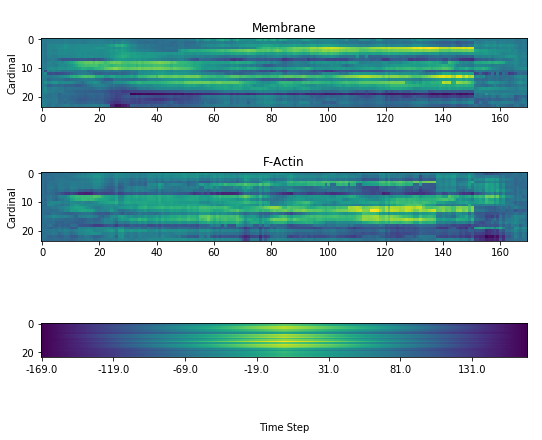

In [108]:
fig = plt.figure(figsize=(8, 6))

# bit subplot
ax = fig.add_subplot(111)
# add subplots
ax_mem = fig.add_subplot(311)
ax_act = fig.add_subplot(312)
ax_cor = fig.add_subplot(313)

# turn off axis lines and ticks of the bit subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

# set common labels
ax.set_xlabel('Time Step')

# set data
ax_mem.imshow(plt_mem.T)
ax_act.imshow(plt_act.T)
ax_cor.imshow(corr.T)

# set title
ax_mem.set_title("Membrane")
ax_act.set_title("F-Actin")

# Y label
ax_mem.set_ylabel("Cardinal")
ax_act.set_ylabel("Cardinal")

# modify correlation x ticks
ticks = ax_cor.get_xticks().tolist()
nt, _ = corr.shape
ot = (nt-1)/2
ticks[:] = [x-ot for x in ticks]
ax_cor.set_xticklabels(ticks)
    
plt.tight_layout()

In [106]:
np.argmax(corr, axis=0)

array([169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169,
       169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169])